## TRAFFIC SIGN RECOGNITION PROJECT

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Creating lists to store image arrays and their resp labels

In [2]:
data =[]
labels = []
classes =43 
cur_path = os.getcwd()

# Preprocess the images

In [3]:
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

In [4]:
#converting images into numpy arrays
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


# Setting up the data for the model

In [6]:
#saving data and lables
np.save('./training/data',data)
np.save('./training/target',labels)

In [7]:
#loding data and labels
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
X_train, X_val, y_train, y_val =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape) 

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#converting labels into one-hot encoding vectors
y_train = to_categorical(y_train,43) 
y_val = to_categorical(y_val,43)

# Building a neural network model

In [10]:
model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compiling and Training the model

In [11]:
#compiling the model using categorical crossentropy loss and adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [12]:
epochs = 20 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
981/981 [==============================] - 11s 8ms/step - loss: 1.8758 - accuracy: 0.5210 - val_loss: 0.5248 - val_accuracy: 0.8794
Epoch 2/20
981/981 [==============================] - 8s 8ms/step - loss: 0.7073 - accuracy: 0.7941 - val_loss: 0.2450 - val_accuracy: 0.9343
Epoch 3/20
981/981 [==============================] - 8s 8ms/step - loss: 0.4602 - accuracy: 0.8638 - val_loss: 0.1920 - val_accuracy: 0.9476
Epoch 4/20
981/981 [==============================] - 8s 8ms/step - loss: 0.3427 - accuracy: 0.9026 - val_loss: 0.1122 - val_accuracy: 0.9691
Epoch 5/20
981/981 [==============================] - 8s 8ms/step - loss: 0.2640 - accuracy: 0.9254 - val_loss: 0.0715 - val_accuracy: 0.9819
Epoch 6/20
981/981 [==============================] - 8s 8ms/step - loss: 0.2467 - accuracy: 0.9313 - val_loss: 0.1093 - val_accuracy: 0.9675
Epoch 7/20
981/981 [==============================] - 8s 8ms/step - loss: 0.2180 - accuracy: 0.9396 - val_loss: 0.0723 - val_accuracy: 0.9805
Epoch

# Plotting the accuracy and loss curves

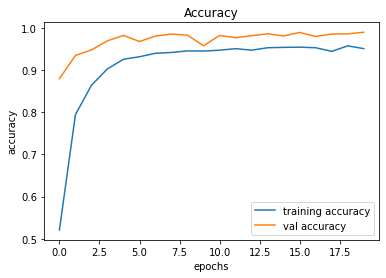

In [13]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

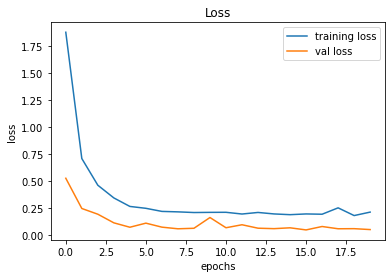

In [14]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model on test data

In [15]:
#creating a function to load labels and image paths from test.csv file

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [16]:
#loading the test.csv file

X_test, label = testing('Test.csv')

In [17]:
# Predicting classes for x_test

Y_pred = model.predict_classes(X_test)
Y_pred

C:\Users\saink\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  1,  7, 10], dtype=int64)

In [18]:
# checking the accuracy of the model on test data

from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9575613618368963


In [19]:
# with this model we got 95.75% accuracy on the unknown test data so we will save this model
model.save("./training/TSR.h5")

# Load the model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./training/TSR.h5')

In [1]:
# we are naming all the classes with strings manually and storing it in a dictionary

# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# creating a function to preprocess the image and output the prediction
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

In [3]:
plot,prediction = test_on_img(r'C:\Users\saink\anaconda3\envs\Traffic_sign_project\Traffic_sign_recognition\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

NameError: name 'model' is not defined

<h1> Summary: </h1>

<ul>
    <li> First, we preprocess our training images and convert them to arrays and save them as vectors.</li>
    <li> We create train test split of our data. </li>
    <li> We convert the labels into categories using one hot encoding.</li>
    <li> We build a convolution neural network and compile it using categorical cross-entropy loss and adam optimizer.</li>
    <li> We fit the model on data and train it for 20 epochs. </li>
    <li> We get 95% accuracy on validation data.</li>
    <li> We test the model on test data and we get 95.75% accuracy on our test data. </li>
</ul>